In [26]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src")
from collections import Counter

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

from train import FashionMNISTDataModule, FashionMNISTPair

In [27]:
DATA_FOLDER = './data'

In [28]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
        
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(12, 12))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNISTPair/raw/train-images-idx3-ubyte.gz to ./data/FashionMNISTPair/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNISTPair/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNISTPair/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNISTPair/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNISTPair/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNISTPair/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNISTPair/raw



/tmp/ipykernel_26432/1808593371.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  show(make_grid(torch.tensor(im), nrow=10))
/tmp/ipykernel_26432/1808593371.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  show(make_grid(torch.tensor(im2), nrow=10))


Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

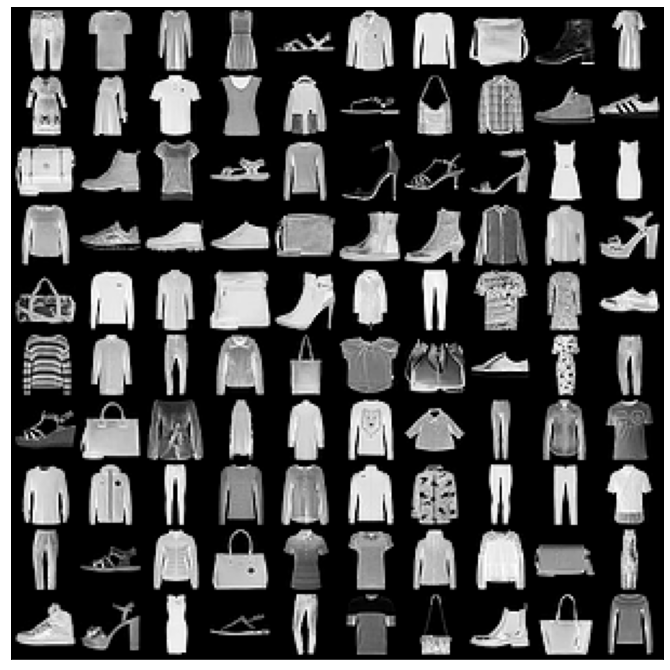

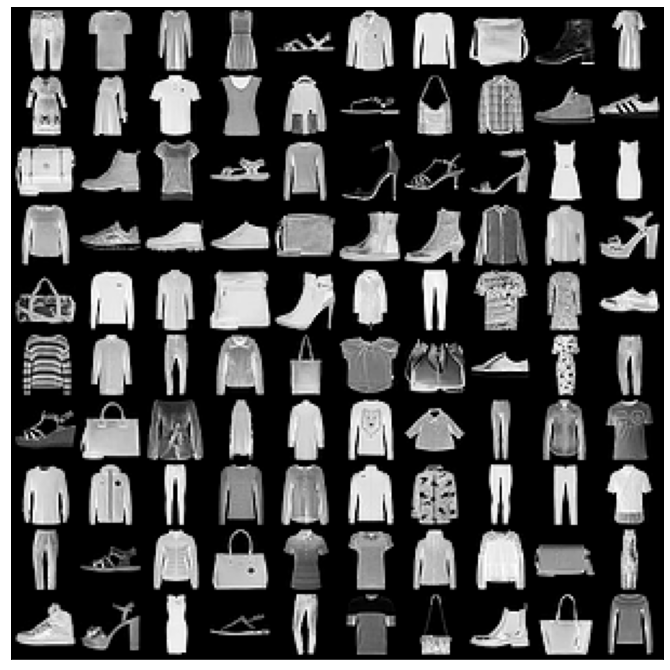

In [29]:
ds = FashionMNISTPair(DATA_FOLDER, download=True, transform=ToTensor())
for im, im2, _ in DataLoader(ds, batch_size=100, shuffle=True):
    show(make_grid(torch.tensor(im), nrow=10))
    show(make_grid(torch.tensor(im2), nrow=10))
    break

Counter(ds[x][2] for x in range(len(ds)))

/tmp/ipykernel_26432/370255684.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  show(make_grid(torch.tensor(im), nrow=10))
/tmp/ipykernel_26432/370255684.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  show(make_grid(torch.tensor(im2), nrow=10))


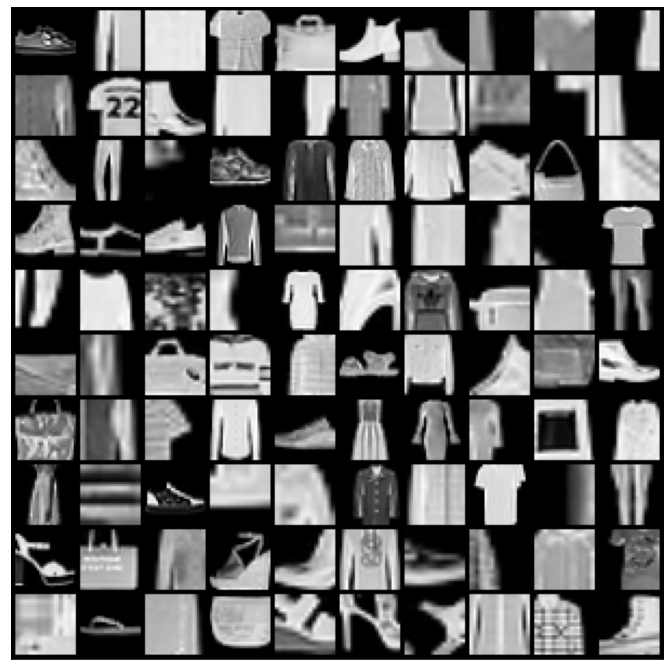

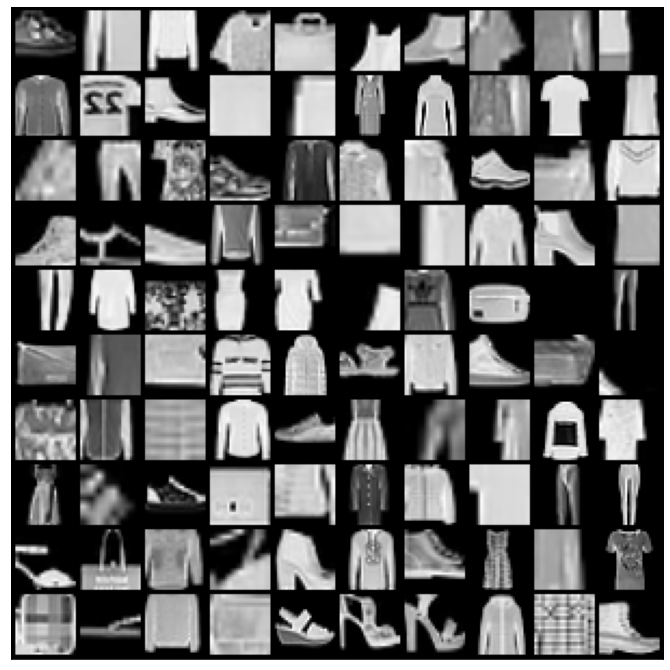

In [31]:
ds_mod = FashionMNISTDataModule(FashionMNISTPair, batch_size=100, data_dir=DATA_FOLDER)
for im, im2, _ in ds_mod.train_dataloader():
    show(make_grid(torch.tensor(im), nrow=10))
    show(make_grid(torch.tensor(im2), nrow=10))
    break

In [32]:
if os.path.isdir(DATA_FOLDER):
    shutil.rmtree(DATA_FOLDER)